재현율 = 민감도 = TPR


In [1]:
# 모델의 오차행렬, 정확도, 정밀도, 재현율 을 표시해주기 위한 함수
def get_clf_eval(y_test,pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    #정확도
    precision = precision_score(y_test,pred)
    #정밀도
    recall = recall_score(y_test,pred)
    #재현율
    print('오차행렬')
    print(confusion)
    print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}')

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:

# 전처리 함수
def fillna(df) :
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df
    
    

def drop_features(df):
    df.drop(columns = ['PassengerId','Name', 'Ticket'],inplace = True)
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Sex', 'Cabin' , 'Embarked']
        
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
        print(le.classes_)
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df



In [4]:
# 데이터 결과 셋 구분
df = pd.read_csv("titanic.csv")
y = df['Survived']
X = df.drop(columns=['Survived'])
X = transform_features(X)

['female' 'male']
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['C' 'N' 'Q' 'S']


In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [6]:
lr_clf = LogisticRegression(solver='liblinear')
#LogisticRegression 도 random_state 값을 가지는데 이는 영향이 없나???

lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705


In [7]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=17)
# random_state 에 따라 모델의 성능이 달라진다 -> random_state를 바꿔가며 테스트할 필요가 있나???
# lr_clf = LogisticRegression(solver='liblinear')
# lr_clf.fit(X_train,y_train)
# pred = lr_clf.predict(X_test)
# get_clf_eval(y_test,pred)

In [8]:
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [52]:
pred_proba = lr_clf.predict_proba(X_test)
# 두개의 값이 나온다.
# 두 값의 합은 1
# {0이 될 확률, 1이 될 확률}
# 몇 퍼센트를 기준으로 (임계치 값을 조정 함으로써 예측 값을 바꿀 수 있다. 기본 0.5)
pred_proba

array([[0.44935225, 0.55064775],
       [0.86335511, 0.13664489],
       [0.86429643, 0.13570357],
       [0.84968519, 0.15031481],
       [0.82343409, 0.17656591],
       [0.84231224, 0.15768776],
       [0.87095489, 0.12904511],
       [0.27228603, 0.72771397],
       [0.78185128, 0.21814872],
       [0.33185998, 0.66814002],
       [0.86178763, 0.13821237],
       [0.87058097, 0.12941903],
       [0.8642595 , 0.1357405 ],
       [0.87065944, 0.12934056],
       [0.56033544, 0.43966456],
       [0.85003022, 0.14996978],
       [0.88954172, 0.11045828],
       [0.74250732, 0.25749268],
       [0.71120224, 0.28879776],
       [0.23776278, 0.76223722],
       [0.75684107, 0.24315893],
       [0.62428169, 0.37571831],
       [0.84655246, 0.15344754],
       [0.82711256, 0.17288744],
       [0.86825628, 0.13174372],
       [0.77003828, 0.22996172],
       [0.82946349, 0.17053651],
       [0.90336131, 0.09663869],
       [0.73372049, 0.26627951],
       [0.68847387, 0.31152613],
       [0.

In [10]:
# np.concatenate([pred_proba,pred],axis=1) # error
# 모양이 같아야한다. 방향에 따라

np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
# 어떤 값을 임계값으로 할 것인가.


array([[0.44935225, 0.55064775, 1.        ],
       [0.86335511, 0.13664489, 0.        ],
       [0.86429643, 0.13570357, 0.        ],
       [0.84968519, 0.15031481, 0.        ],
       [0.82343409, 0.17656591, 0.        ],
       [0.84231224, 0.15768776, 0.        ],
       [0.87095489, 0.12904511, 0.        ],
       [0.27228603, 0.72771397, 1.        ],
       [0.78185128, 0.21814872, 0.        ],
       [0.33185998, 0.66814002, 1.        ],
       [0.86178763, 0.13821237, 0.        ],
       [0.87058097, 0.12941903, 0.        ],
       [0.8642595 , 0.1357405 , 0.        ],
       [0.87065944, 0.12934056, 0.        ],
       [0.56033544, 0.43966456, 0.        ],
       [0.85003022, 0.14996978, 0.        ],
       [0.88954172, 0.11045828, 0.        ],
       [0.74250732, 0.25749268, 0.        ],
       [0.71120224, 0.28879776, 0.        ],
       [0.23776278, 0.76223722, 1.        ],
       [0.75684107, 0.24315893, 0.        ],
       [0.62428169, 0.37571831, 0.        ],
       [0.

In [11]:
from sklearn.preprocessing import Binarizer

In [12]:
X=[[1,-1,2], [2,0,0],[0,1.1,1.2]]

In [13]:
binarizer = Binarizer(threshold=1.1)
# 임계값 설정, 기본 : 0

In [14]:
binarizer.fit_transform(X)
# 임계값 적용

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [15]:
custom_threshold=0.5

In [16]:
pred_proba
# 앞이 아니라 뒤쪽에 있는 데이터

array([[0.44935225, 0.55064775],
       [0.86335511, 0.13664489],
       [0.86429643, 0.13570357],
       [0.84968519, 0.15031481],
       [0.82343409, 0.17656591],
       [0.84231224, 0.15768776],
       [0.87095489, 0.12904511],
       [0.27228603, 0.72771397],
       [0.78185128, 0.21814872],
       [0.33185998, 0.66814002],
       [0.86178763, 0.13821237],
       [0.87058097, 0.12941903],
       [0.8642595 , 0.1357405 ],
       [0.87065944, 0.12934056],
       [0.56033544, 0.43966456],
       [0.85003022, 0.14996978],
       [0.88954172, 0.11045828],
       [0.74250732, 0.25749268],
       [0.71120224, 0.28879776],
       [0.23776278, 0.76223722],
       [0.75684107, 0.24315893],
       [0.62428169, 0.37571831],
       [0.84655246, 0.15344754],
       [0.82711256, 0.17288744],
       [0.86825628, 0.13174372],
       [0.77003828, 0.22996172],
       [0.82946349, 0.17053651],
       [0.90336131, 0.09663869],
       [0.73372049, 0.26627951],
       [0.68847387, 0.31152613],
       [0.

In [17]:
pred_proba[:,1]
#모든 행의 두번째 요소 (1이 될 확률)

array([0.55064775, 0.13664489, 0.13570357, 0.15031481, 0.17656591,
       0.15768776, 0.12904511, 0.72771397, 0.21814872, 0.66814002,
       0.13821237, 0.12941903, 0.1357405 , 0.12934056, 0.43966456,
       0.14996978, 0.11045828, 0.25749268, 0.28879776, 0.76223722,
       0.24315893, 0.37571831, 0.15344754, 0.17288744, 0.13174372,
       0.22996172, 0.17053651, 0.09663869, 0.26627951, 0.31152613,
       0.92353131, 0.7746788 , 0.12838061, 0.75924582, 0.37288269,
       0.22996172, 0.09445724, 0.59397426, 0.06956416, 0.1234948 ,
       0.30202578, 0.10335405, 0.78006621, 0.68434287, 0.62057772,
       0.62067109, 0.92838719, 0.44222414, 0.92085513, 0.13196918,
       0.49209943, 0.12934056, 0.14423595, 0.65129871, 0.28441583,
       0.21146794, 0.2538079 , 0.13571   , 0.15920997, 0.40161934,
       0.26467919, 0.11294404, 0.454472  , 0.44673657, 0.37416478,
       0.11636723, 0.64818744, 0.60096648, 0.91699185, 0.14927478,
       0.13221181, 0.16929076, 0.12350958, 0.94040085, 0.21264

In [18]:
# 이차원이 필요
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

In [19]:
custom_threshold=0.5
binarizer = Binarizer(threshold=custom_threshold)

In [20]:
custom_predict = binarizer.fit_transform(pred_proba_1)

In [21]:
# custom_predict = Binarizer(threshold=custom_threshold).fit_transform(pred_proba_1)

In [22]:
# 오차행렬
# [[108  10]
#  [ 14  47]]
# 정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705

get_clf_eval(y_test,custom_predict)

# 임계값의 기본은 0.5 이다

오차행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705


In [23]:
custom_threshold=0.4
custom_predict = Binarizer(threshold=custom_threshold).fit_transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

# 1 임계값 감소 재현율 증가

오차행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.7042, 재현율 : 0.8197


In [24]:
custom_threshold=0.6
custom_predict = Binarizer(threshold=custom_threshold).fit_transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

# 1 임계값 증가 정밀도 증가

오차행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8771, 정밀도 : 0.8980, 재현율 : 0.7213


In [25]:
thresholds = [0.40,0.45,0.50,0.55,0.60]

In [26]:

def get_eval_by_threshold(y_test, pred_proba_1,thresholds):
    for custom_threshold in thresholds :
        custom_predict= binarizer = Binarizer(threshold = custom_threshold).fit_transform(pred_proba_1)
        get_clf_eval(y_test,custom_predict)

get_eval_by_threshold(y_test,pred_proba_1,thresholds)

오차행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.7042, 재현율 : 0.8197
오차행렬
[[105  13]
 [ 13  48]]
정확도 : 0.8547, 정밀도 : 0.7869, 재현율 : 0.7869
오차행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705
오차행렬
[[111   7]
 [ 16  45]]
정확도 : 0.8715, 정밀도 : 0.8654, 재현율 : 0.7377
오차행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8771, 정밀도 : 0.8980, 재현율 : 0.7213


In [27]:
from sklearn.metrics import precision_recall_curve

In [28]:
precision_recall_curve(y_test,pred_proba_1)
# return
# precision : ndarray of shape (n_thresholds + 1,)
#     Precision values such that element i is the precision of
#     predictions with score >= thresholds[i] and the last element is 1.

# recall : ndarray of shape (n_thresholds + 1,)
#     Decreasing recall values such that element i is the recall of
#     predictions with score >= thresholds[i] and the last element is 0.

# thresholds : ndarray of shape (n_thresholds,)
#     Increasing thresholds on the decision function used to compute
#     precision and recall. n_thresholds <= len(np.unique(probas_pred)).

(array([0.37888199, 0.375     , 0.37735849, 0.37974684, 0.38216561,
        0.37820513, 0.38064516, 0.38311688, 0.38562092, 0.38815789,
        0.39072848, 0.39597315, 0.40136054, 0.41843972, 0.42142857,
        0.42446043, 0.43065693, 0.43382353, 0.43703704, 0.44029851,
        0.44360902, 0.4469697 , 0.44615385, 0.4496124 , 0.4453125 ,
        0.44094488, 0.44444444, 0.44      , 0.44354839, 0.44715447,
        0.45454545, 0.45833333, 0.46218487, 0.46610169, 0.47008547,
        0.47413793, 0.47826087, 0.48245614, 0.48672566, 0.49107143,
        0.4954955 , 0.5       , 0.50458716, 0.50925926, 0.51401869,
        0.51886792, 0.52380952, 0.52884615, 0.53398058, 0.53921569,
        0.54455446, 0.55      , 0.55555556, 0.56122449, 0.56701031,
        0.57291667, 0.59139785, 0.59782609, 0.6043956 , 0.61111111,
        0.61797753, 0.625     , 0.63218391, 0.63953488, 0.64705882,
        0.64285714, 0.65060241, 0.65853659, 0.66666667, 0.675     ,
        0.6835443 , 0.69230769, 0.68831169, 0.68

In [29]:
precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_1)

In [30]:
precisions.shape, recalls.shape, thresholds.shape

((148,), (148,), (147,))

In [53]:
thresholds

array([1.94326279, 0.94326279, 0.94040085, 0.93261004, 0.87778554,
       0.86565305, 0.72771397, 0.68584875, 0.64779433, 0.63856712,
       0.62629695, 0.62067109, 0.61651659, 0.60096648, 0.57135187,
       0.55064775, 0.52051719, 0.51724753, 0.49209943, 0.454472  ,
       0.44497249, 0.44222414, 0.41445142, 0.40194454, 0.37571831,
       0.32202995, 0.28441583, 0.283459  , 0.23280098, 0.22996172,
       0.14927478, 0.14927303, 0.14423595, 0.13866563, 0.13821237,
       0.13664489, 0.1357405 , 0.13571   , 0.13196918, 0.13174372,
       0.12941903, 0.12934056, 0.12904511, 0.12350958, 0.1234948 ,
       0.11636723, 0.11573102, 0.01974988])

In [31]:
thr_index = np.arange(0,thresholds.shape[0],15)

In [32]:
thr_index

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135])

In [33]:
np.round(thresholds[thr_index],2)
#소수 둘쨰점 반올림

array([0.12, 0.13, 0.15, 0.17, 0.26, 0.38, 0.49, 0.63, 0.76, 0.9 ])

In [34]:
np.round(precisions[thr_index],3)

array([0.379, 0.424, 0.455, 0.519, 0.618, 0.676, 0.797, 0.93 , 0.964,
       1.   ])

In [35]:
np.round(recalls[thr_index],3)

array([1.   , 0.967, 0.902, 0.902, 0.902, 0.82 , 0.77 , 0.656, 0.443,
       0.213])

In [36]:
import matplotlib.pyplot as plt

In [37]:

def precision_recall_curve_plot(y_test, pred_proba_1) :
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    sumlist = precisions[0:threshold_boundary]+recalls[0:threshold_boundary]
    plt.plot(thresholds, sumlist,label='sum')
    # 개수가 다르기 때문에
    
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlabel('임계값')
    plt.ylabel('정밀도와 재현율')
    plt.legend()
    plt.grid()
    plt.show()

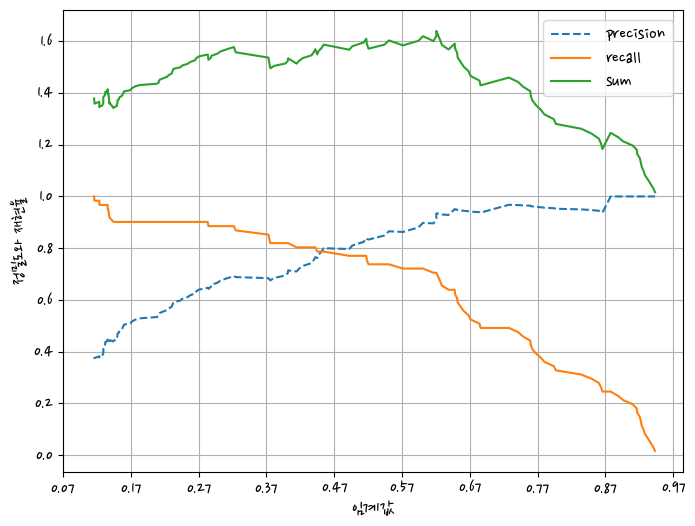

In [38]:
precision_recall_curve_plot(y_test,pred_proba_1)

In [39]:
from sklearn.metrics import f1_score

In [40]:
f1_score(y_test,pred)

0.7966101694915254

In [41]:
#임계치에 따른 f1_score
def get_clf_eval(y_test,pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix,f1_score
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    #정확도
    precision = precision_score(y_test,pred)
    #정밀도
    recall = recall_score(y_test,pred)
    #재현율
    f1= f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, F1 : {f1:.4f}')
    
thresholds = [0.40,0.45,0.50,0.55,0.60]
def get_eval_by_threshold(y_test, pred_proba_1,thresholds):
    for custom_threshold in thresholds :
        custom_predict= binarizer = Binarizer(threshold = custom_threshold).fit_transform(pred_proba_1)
        print(f'임계값 : {custom_threshold}')
        get_clf_eval(y_test,custom_predict)
        

get_eval_by_threshold(y_test,pred_proba_1,thresholds)

임계값 : 0.4
오차행렬
[[97 21]
 [11 50]]
정확도 : 0.8212, 정밀도 : 0.7042, 재현율 : 0.8197, F1 : 0.7576
임계값 : 0.45
오차행렬
[[105  13]
 [ 13  48]]
정확도 : 0.8547, 정밀도 : 0.7869, 재현율 : 0.7869, F1 : 0.7869
임계값 : 0.5
오차행렬
[[108  10]
 [ 14  47]]
정확도 : 0.8659, 정밀도 : 0.8246, 재현율 : 0.7705, F1 : 0.7966
임계값 : 0.55
오차행렬
[[111   7]
 [ 16  45]]
정확도 : 0.8715, 정밀도 : 0.8654, 재현율 : 0.7377, F1 : 0.7965
임계값 : 0.6
오차행렬
[[113   5]
 [ 17  44]]
정확도 : 0.8771, 정밀도 : 0.8980, 재현율 : 0.7213, F1 : 0.8000


In [42]:
# 원하는 수치에 따라 적절히 임계값을 선택 한다.

# ROC 곡선 그래프
# ROC 그래프의 아래쪽 부분의 면적 값 = AOC
# 1에 가까울 수록 좋다.
# AUC score

# 이차대전 통신장비 개선을 위해 고안되었다.
# FPR 이 변할떄 TPR 이 어떨게 변하는지 나타내는 곡선


# FPR 을 x축으로, TPR을 Y축으로 잡은 그래프
# FPR 실제 0 못맞춘비율
# TPE 셀지 1 맞춘 비율 = 재현율                                                                                                                                                                                                                                                                                           


# 1일때 맞춘 비율을 늘리면, 0일때 못바춘 비율도 늘어난다.

get_eval_by_threshold

<function __main__.get_eval_by_threshold(y_test, pred_proba_1, thresholds)>

In [43]:
from sklearn.metrics import roc_curve

In [44]:
roc_curve(y_test,pred_proba_1)
# fpr tpr thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00847458, 0.00847458, 0.01694915, 0.01694915, 0.02542373,
        0.02542373, 0.02542373, 0.04237288, 0.04237288, 0.05932203,
        0.05932203, 0.07627119, 0.07627119, 0.10169492, 0.10169492,
        0.12711864, 0.12711864, 0.16949153, 0.16949153, 0.20338983,
        0.20338983, 0.25423729, 0.25423729, 0.3220339 , 0.34745763,
        0.55932203, 0.57627119, 0.59322034, 0.59322034, 0.60169492,
        0.60169492, 0.61016949, 0.61864407, 0.66101695, 0.6779661 ,
        0.69491525, 0.74576271, 0.77966102, 0.8220339 , 0.8220339 ,
        0.84745763, 0.84745763, 1.        ]),
 array([0.        , 0.01639344, 0.03278689, 0.06557377, 0.24590164,
        0.24590164, 0.49180328, 0.49180328, 0.63934426, 0.63934426,
        0.67213115, 0.70491803, 0.70491803, 0.72131148, 0.72131148,
        0.73770492, 0.73770492, 0.7704918 , 0.7704918 , 0.78688525,
        0.78688525, 0.80327869, 0.80327869, 0.81967213, 0.81967213,
  

In [45]:
fpr , tpr , thresholds = roc_curve(y_test,pred_proba_1)

In [46]:
def roc_curve_plot(y_test,pred_proba_1):
    from sklearn.metrics import roc_curve
    import matplotlib.pyplot as plt
    fprs , tprs, thresholds = roc_curve(y_test,pred_proba_1)
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    plt.legend()
    plt.show()
 

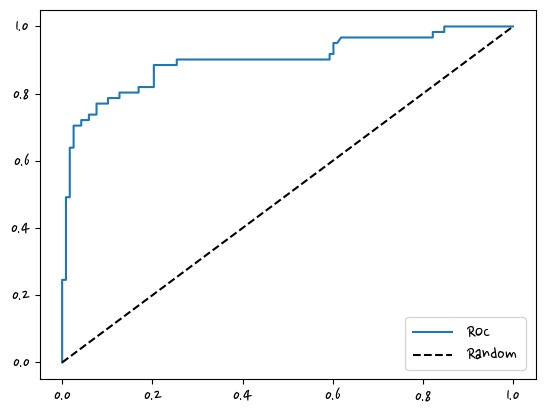

In [47]:
roc_curve_plot(y_test,pred_proba_1)

In [48]:
from sklearn.metrics import roc_auc_score

In [49]:
roc_auc_score(y_test,pred_proba_1)

0.8986524034454015

In [50]:
def get_clf_eval(y_test,pred):
    from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix,f1_score,roc_auc_score
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    #정확도
    precision = precision_score(y_test,pred)
    #정밀도
    recall = recall_score(y_test,pred)
    #재현율
    f1= f1_score(y_test,pred)
    auc = roc_auc_score(y_test,pred_proba_1)
    print('오차행렬')
    print(confusion)
    print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, F1 : {f1:.4f}, AUC : {auc:.4f}')

In [51]:
#https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
#pima indians data

pd.read_csv('diabetes.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
